In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Comparing machine learning models in scikit-learn

**Questions**:
- How do I choose **which model to use** for my supervised learning task?
- How do I choose the **best tuning parameters** for that model?
- How do I estimate the **likely performance of my model** on out-of-sample data?

**Solution:** Model evaluation procedures

## Evaluation procedure #1: Train/test split

- Split the dataset into two pieces: a **training set** and a **testing set**.
- Train the model of the **training set**
- Test the model on the **testing set** and evaluate how well we did.

In [3]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris = pd.read_csv(url, header=None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'])
X = iris.iloc[:,0:4] # feature matrix
y = iris.species

In [36]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size=0.4)

In [25]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [26]:
# STEP 2: train the model on the training set
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [27]:
# STEP 3: make predictions on the testing set
y_test_pred = knn_clf.predict(X_test)

# compare actual response values (t_test) with predicted response values (y_test_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.95


What is the best value for n_neighbors?

In [37]:
# try k=1 through k=25 and record testing accuracy
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_test_pred = knn_clf.predict(X_test)
    scores.append(accuracy_score(y_test,y_test_pred))

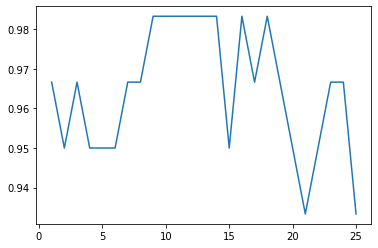

In [38]:
plt.plot(k_range, scores)